# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования**

На основе данных банка исследовать влияние семейного положения и
количества детей на факт погашения кредита в срок.

**Ход исследовани**

О качестве данных ничего не известно, понадобится обзор данных.
Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки найти возможность исправить критичные ошибки данных.

Исследование пройдёт в три этапа:

- Обзор данных
- Предобработка данных
- Проверка гипотез

**Описание данных**
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Оглавление

<a href='#1'> 1. Общая информация</a>

<a href='#2'> 2. Предобработка данных</a>
- <a href='#3'> 2.1 Удаление пропусков</a>
- <a href='#4'> 2.2 Обработка аномальных значений</a>
- <a href='#5'> 2.3 Изменение типов данных</a>
- <a href='#6'> 2.4 Обработка дубликатов</a>
- <a href='#7'> 2.4 Категоризация данных</a>

<a href='#8'> 3. Исследование данных</a>

<a href='#9'> 4. Общий вывод</a>

**Импорт библиотек**

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Общая информация <a id='1'></a>

Прочитаем файл и сохраним его в переменной dаta:

In [32]:
# импорт датафрейма
data = pd.read_csv('data.csv')

Выведем первые 20 строчек датафрейма:

In [33]:
# первые 20 строчек
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме:

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. Предобработка данных <a id='2'></a>

### 2.1 Удаление пропусков <a id='3'></a>

Посмотрим количество пропущенных значений для каждого столбца.

In [35]:
# подсчет пропущеных значений
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем позже. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [36]:
# заполнение пропущеных значений медианой
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### 2.2 Обработка аномальных значений <a id='4'></a>

В датафрейме присутствуют аномальные значения - отрицательное количество дней трудового стажа в столбце `days_employed`.Обработаем значения в этом столбце, заменив положительными с помощью метода `abs()`.

In [37]:
# замена отрицательных значений
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [38]:
# группировка по типу занятости и вычисление медианы трудового стажа
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

**Выведем перечень уникальных значений столбца `children`**

In [39]:
# уникальные значения столбца
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим эти строки.

In [40]:
# удаление аномальных значений
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [41]:
# уникальные значения столбца
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [42]:
# заполнение пропусков медианой
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены.

In [43]:
# подсчет пропусков
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.3 Изменение типов данных <a id='5'></a>

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [44]:
# изменение типа данных
data['total_income'] = data['total_income'].astype(int)

### 2.4 Обработка дубликатов <a id='6'></a>

Выведием на экран количество дубликатов в данных.

In [45]:
# подсчет дубликатов
data.duplicated().sum()

54

In [46]:
# удаление дубликатов
data = data.drop_duplicates()

Исправим неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, записанные с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [47]:
# приведение к нижнему регистру
data['education'] = data['education'].str.lower()

### 2.5 Категоризация данных <a id='7'></a>

**На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [48]:
# функция для категоризации 
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [49]:
# применение функции к датафрейму
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [50]:
# просмотр уникальных значений 
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [51]:
# функция категоризации цели взятия кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [52]:
# применение функции
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## 3. Исследование данных <a id='8'></a>

**Проверим, есть ли зависимость между количеством детей и возвратом кредита в срок.**

In [53]:
#сводная таблица по количеству детей
children_pivot = data.pivot_table(
    index = ['children'], values = 'debt', aggfunc = ['count','sum','mean']).reset_index().rename(
    columns={'debt':'','sum':'debt_sum'})
display(children_pivot)

,children,count,debt_sum,mean
,,,,
0,0,14107,1063,0.075353
1,1,4809,444,0.092327
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


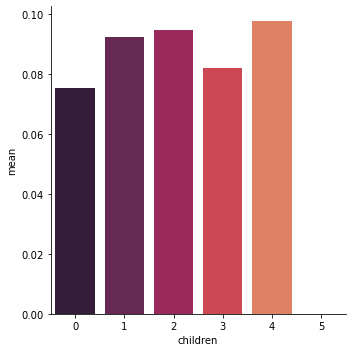

In [54]:
#график соотношения количества должников к количеству детей
debt_children = sns.catplot(
    x='children',
    y='mean',
    palette="rocket",
    data=children_pivot,
    kind='bar')

**Выводы** 

Согласно полученным данным, можно сказать, что количество детей влияет на возврат кредита- чем больше детей, тем чаще кредит не возвращается в срок. Но данная тенденция слабо выражена, так как разница между группами не превышает 1-2%.
А для категорий с 4-5 детьми выборка не достаточна для получения корректного вывода.

**Проверим, есть ли зависимость между семейным положением и возвратом кредита в срок.**

In [55]:
#сводная таблица по семейному положению
family_pivot = data.pivot_table(
    index = ['family_status'], values = 'debt', aggfunc = ['count','sum','mean']).reset_index().rename(
    columns={'debt':'','sum':'debt_sum'}).sort_values(by='mean', ascending=False)
display(family_pivot)

,family_status,count,debt_sum,mean
,,,,
0,Не женат / не замужем,2796,273,0.097639
3,гражданский брак,4146,385,0.092861
4,женат / замужем,12266,927,0.075575
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246


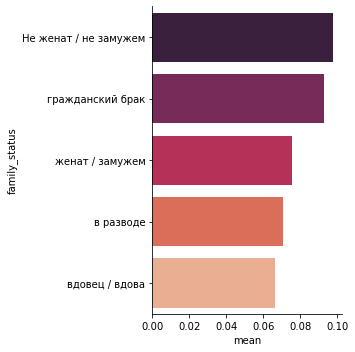

In [56]:
#Количество должников по семейному положению
debt_family = sns.catplot(x='mean', y='family_status', palette="rocket", data=family_pivot, kind='bar')

**Выводы** 

Из полученных данных можно выделить три группы:

- "Не женат / не замужем" и "гражданский брак" - самое высокое значение.
- "Женат / замужем" и "в разводе" - среднее значение.
- У категории "вдовец / вдова" самое низкое значение.

По юридической ответственности в первых двух группах присутсвуют как одникие, так и пары. Из этого можно сделать вывод, что прямой зависимости между семейным положением и возвратом кредита в срок нет.

**Проверим, есть ли зависимость между уровнем дохода и возвратом кредита в срок.**

In [57]:
#сводная таблица по уровню дохода
income_pivot = data.pivot_table(
    index = ['total_income_category'], values = 'debt', aggfunc = ['count','sum','mean']).reset_index().rename(
    columns={'debt':'','sum':'debt_sum'})
display(income_pivot)

,total_income_category,count,debt_sum,mean
,,,,
0,A,25,2,0.080000
1,B,5014,354,0.070602
2,C,15938,1353,0.084891
3,D,349,21,0.060172
4,E,22,2,0.090909


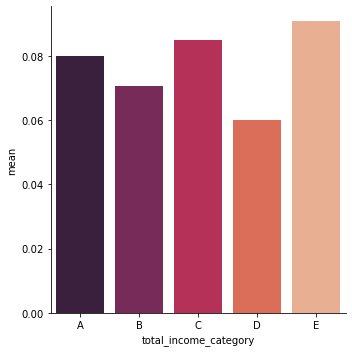

In [58]:
#Количество должников по уровню заработка
debt_income = sns.catplot(x='total_income_category', y='mean', palette="rocket", data=income_pivot, kind='bar')

**Выводы** 

Нет прямой зависимости между уровнем заработка и возвратом кредита в срок. Так как с увеличением уровня дохода доля должников меняется в разную сторону. Однако, выборка для категорий A и E мала, чтобы сделать корректные выводы.

**Как цель кредита влияет на его возврат в срок.**

In [59]:
#сводная таблица по цели кредита
purpose_pivot = data.pivot_table(
    index = ['purpose_category'], values = 'debt', aggfunc = ['count','sum','mean']).reset_index().rename(
    columns={'debt':'','sum':'debt_sum'}).sort_values(by='mean', ascending=False)
display(purpose_pivot)

,purpose_category,count,debt_sum,mean
,,,,
0,операции с автомобилем,4281,400,0.093436
2,получение образования,3989,369,0.092504
3,проведение свадьбы,2324,183,0.078744
1,операции с недвижимостью,10754,780,0.072531


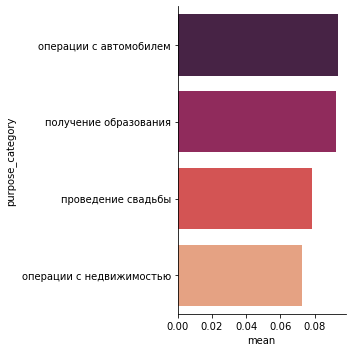

In [60]:
#Количество должников по цели взятия кредита
debt_pupose = sns.catplot(x='mean', y='purpose_category', palette="rocket", data=purpose_pivot, kind='bar')

**Выводы**

Лидирующую позицию занимает категория "операции с автомобилем". С небольшим отставанием "получение образования".
"Операции с недвижимостью" имеют самую маленькую долю должников, так как жилье является первой необходимостью. Чтобы не остаться без места для проживания, клиенты чаще всего возвращают кредит в срок по этой категории.

**Возможные причины появления пропусков в исходных данных:**

Пропуски присутствовали в колонках об общем трудовом стаже и ежемесячном заработке.
Ежемесячный заработок является важным критерием при выдаче кредита, поэтому пропуски в этой колонке скорее всего являются ошибкой при выгрузке или записи данных. Общий трудовой стаж мог быть не указан самим клиентом, но также данный могли быть утеряны при некорректной выгрузке.

**Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных:**

Медиана корректнее отобразит количественные переменные, при наличии анамальных значений в таблице. Среднее значение может исказить данные и привести к неверным выводам.

## 4. Общий вывод <a id='9'></a>

В данном исследовании были проверены 4 условия влияния на возврат кредита в срок.

- **Зависимость между семейным положением и возвратом кредита в срок.**
Прямого влияния на данный критерий не обнаружено. Так же нет достаточной выборки по клиентам с 4 и 5 детьми.

- **Зависимость между семейным положением и возвратом кредита в срок.**
Прямого влияния не обнаружено, группы каждой категории составляют как одинокие так и пары.

- **Зависимость между уровнем дохода и возвратом кредита в срок.**
Прямого влияния не обнаружено. С повышением уровня дохода доля должников распределяется равномерно. Однако, выборка для категорий A и E мала, чтобы сделать корректные выводы.

- **Разные цели кредита влияют на его возврат в срок.**
"Операции с недвижимостью" является благонадежной целью взятия кредита.
"Операции с недвижимостью" не считаются первой необходимостью, поэтому клиенты чаще задерживают выплаты. Можно сделать вывод, что цель кредита имеет влияние на возврат кредита в срок.